In [ ]:
# Link Trabalho Final : https://www.dropbox.com/s/3fla2xuc8t9xba2/Deep%20Learning%20-%20Lista%20de%20Exerc%C3%ADcios%20v1.4.pdf?dl=0

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd

Variaveis do dataframe Iris sklearn ['setosa', 'versicolor', 'virginica']


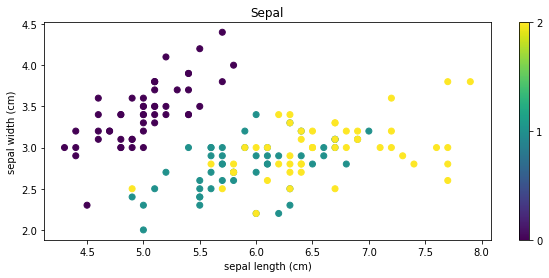

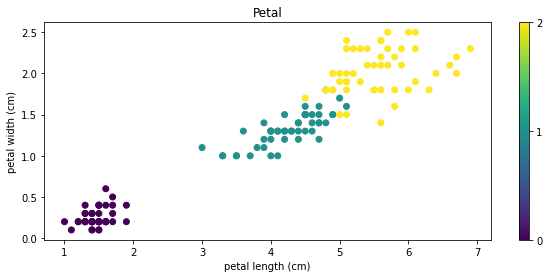

In [2]:
# Carregando Iris
iris = datasets.load_iris()
print("Variaveis do dataframe Iris sklearn",list(iris.target_names))

# Plotando a distribuição das classes
import matplotlib.pyplot as plt
import matplotlib.cm as cm

n_samples, n_features = iris.data.shape
def Show_Diagram(_x ,_y,title):
    plt.figure(figsize=(10,4))
    plt.scatter(iris.data[:,_x], 
    iris.data[:, _y], c=iris.target, cmap=cm.viridis)
    plt.xlabel(iris.feature_names[_x]);  
    plt.ylabel(iris.feature_names[_y]); 
    plt.title(title)
    plt.colorbar(ticks=([0, 1, 2]));
    plt.show();
Show_Diagram(0,1,'Sepal')
Show_Diagram(2,3,'Petal')

In [3]:
#Convertendo Iris to Pandas Dataframe
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

print("")
print("Colunas do Dataframe",df.columns)
print("")
print("Shape",df.shape)

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df['target']

print("y")
print(y.head(5))
print("")
print("X")
X.head(5)


Colunas do Dataframe Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

Shape (150, 5)
y
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

X


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
#Splitting the data into training and test test
X = df.drop(['target'], axis = 1)
X = np.array(X)

y = df['target']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1) 

In [5]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(4,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(3,activation='softmax'))

model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'SGD' , metrics = ['accuracy'] )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 21        
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


In [6]:
#fitting the model and predicting 
model.fit(X_train,y_train,epochs=1000)
y_pred = model.predict(X_test)

#y_test_class = np.argmax(y_test,axis=1)
#y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/1000
4/4 [==============================] - 13s 4ms/step - loss: 1.0511 - accuracy: 0.6735
Epoch 2/1000
4/4 [==============================] - 0s 3ms/step - loss: 1.0105 - accuracy: 0.6777
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.9846 - accuracy: 0.6756
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.9373 - accuracy: 0.7006
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.8947 - accuracy: 0.7038
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.9218 - accuracy: 0.6485
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.8700 - accuracy: 0.6808
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.8431 - accuracy: 0.7038
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7955 - accuracy: 0.7392
Epoch 10/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.8137 - accuracy: 0.6850
Epoch 11/1000
4/4 

In [7]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1/1 [==============================] - 1s 641ms/step - loss: 0.1032 - accuracy: 0.9667

accuracy: 96.67%


In [8]:
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 3ms/step - loss: 0.0828 - accuracy: 0.9750

accuracy: 97.50%
